In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.sankey import Sankey
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'plotly'

In [24]:
data = pd.read_excel('V02Max_Combined.xlsx')
data_Merged = pd.read_excel("merged_athletes_data.xlsx")
data_Kayaking = pd.read_excel("V02Max_Combined.xlsx", "Kayaking")
data_Athletes = pd.read_excel("V02Max_Combined.xlsx", "Athletes")
data_Triathlon = pd.read_excel("V02Max_Combined.xlsx", "Triathlon")
data_Fencing = pd.read_excel("V02Max_Combined.xlsx", "Fencing")
data_Criteria = pd.read_excel("crieteria_data.xlsx")

/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


1. VO2 vs. Power Output Relationship
   Findings:
   Power output increases, VO2 also increases.
   This relationship suggests that higher physical exertion (power output) results in higher oxygen consumption (VO2).

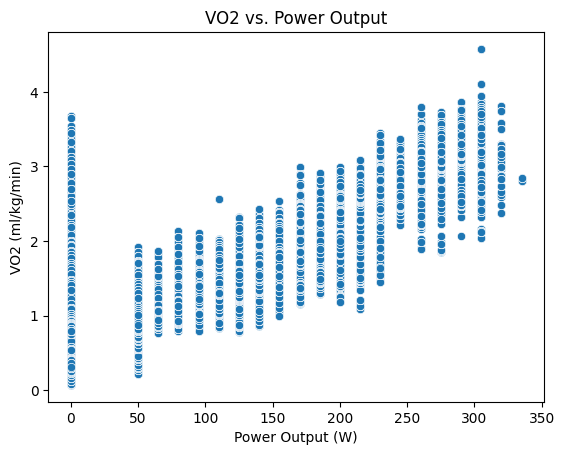

In [25]:

sns.scatterplot(x='power', y='VO2', data=data_Merged)
plt.title('VO2 vs. Power Output')
plt.xlabel('Power Output (W)')
plt.ylabel('VO2 (ml/kg/min)')
plt.show()

In [26]:
2.HR analysis(HR pattern)

SyntaxError: invalid syntax (1608534581.py, line 1)

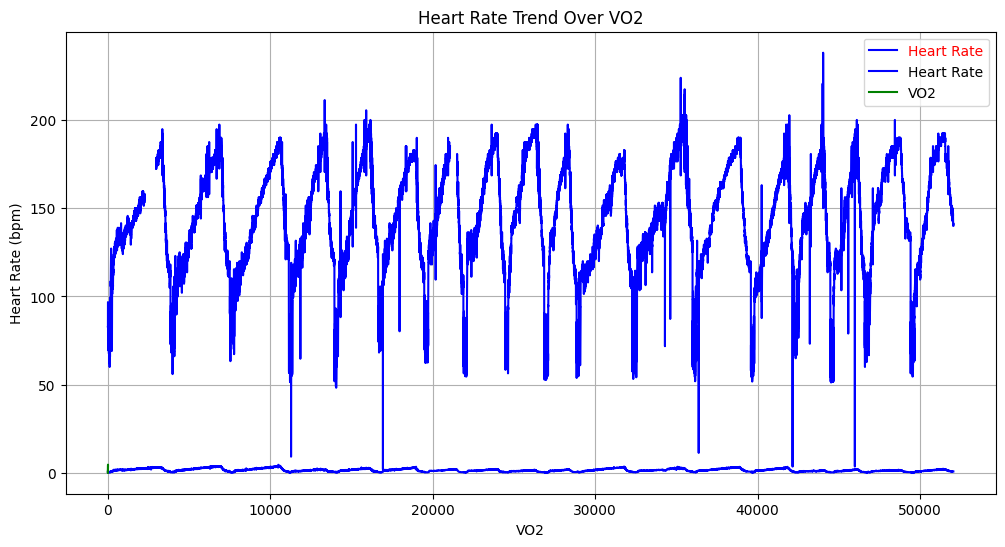

In [27]:
# Plot HR data
copy_data_merged_sheet = data_Merged.copy()
copy_data_merged_sheet['HR'] = 60 / (copy_data_merged_sheet['RR'] / 1000)

plt.figure(figsize=(12, 6))

plt.plot(copy_data_merged_sheet.index,copy_data_merged_sheet['HR'],copy_data_merged_sheet['VO2'], label='Heart Rate', color='blue')
plt.plot(copy_data_merged_sheet['VO2'], copy_data_merged_sheet['VO2'], label='VO2', color='green')
plt.title('Heart Rate Trend Over Time')

plt.title('Heart Rate Trend Over VO2')
plt.xlabel('VO2')
plt.ylabel('Heart Rate (bpm)')
legend = plt.legend()
legend.get_texts()[0].set_color("red") 
plt.grid(True)
plt.show()

**3.create a pie chart on the number of athletes per sport**

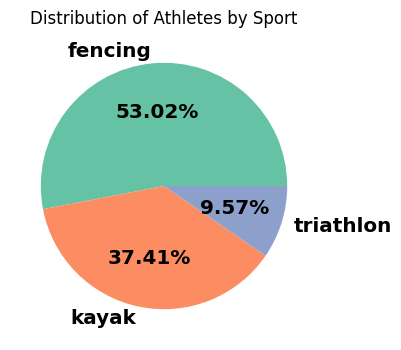

In [28]:
#merging joined sports data with athlete data
merged_athlete_sport = data_Merged.merge(data_Athletes, on='ID', how='left' )

# Count the number of athletes per sport
count_athlete_per_sport = merged_athlete_sport['sport'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
count_athlete_per_sport.plot.pie(autopct='%1.2f%%', colors=sns.color_palette('Set2'),textprops={'size' :'x-large','fontweight':'bold'})
plt.title('Distribution of Athletes by Sport')
plt.ylabel('')  # Hide y-label as it is unnecessary for a pie chart
plt.show()


**4.what is avg of power output between male and female athletes?**

In [29]:
#getting avg poer in male aand female
avg_power_gender=merged_athlete_sport.groupby('Gender')['power'].mean().reset_index()

#renaming coloums for better readability
avg_power_gender.columns = ['Gender', 'Average Power Output']

print(avg_power_gender.to_string(index=False))


Gender  Average Power Output
Female            104.502347
  Male            109.030776


In [31]:
Analysis:Male has more power output then female

SyntaxError: invalid syntax (1826525761.py, line 1)

**5.How many athletes are out of  their safe heart rate limits during exercise?**

In [32]:

#calculating HR
merged_athlete = merged_athlete_sport2.copy()
#merged_athlete_sport2=merged_athlete_sport

merged_athlete['HR']=60/(merged_athlete.RR/1000)

#Step 1 calculating Hr max from age
#keeping required columns
merged_athlete=merged_athlete[['ID','age','HR',]]
merged_athlete.loc[:, 'HR_max'] = 220 - merged_athlete['age']

#merged_athlete['HR_max'] = 220 - merged_athlete_sport2['age']

# Step 2: Define the safe heart rate limit as 85% of HR_max
merged_athlete['safe_HR_limit'] = 0.85 * merged_athlete['HR_max']

# Step 3: Identify when athletes exceed the safe heart rate limit
merged_athlete['exceeds_limit_safe_HR'] = merged_athlete['HR'] > merged_athlete['safe_HR_limit']

# Step 4: Identify the unique IDs of athletes who exceeded their safe HR limit
athletes_exceeded_HR = merged_athlete[merged_athlete['exceeds_limit_safe_HR']]['ID'].unique()

# Step 5: Count the number of unique athletes who exceeded their safe HR limit
num_athletes_exceeded_HR = len(athletes_exceeded_HR)
print ('count of Participants who exceeds safe heart rate limits:',num_athletes_exceeded_HR)

NameError: name 'merged_athlete_sport2' is not defined

**6. Analyze the power at VT1 and VT2 across the sports**

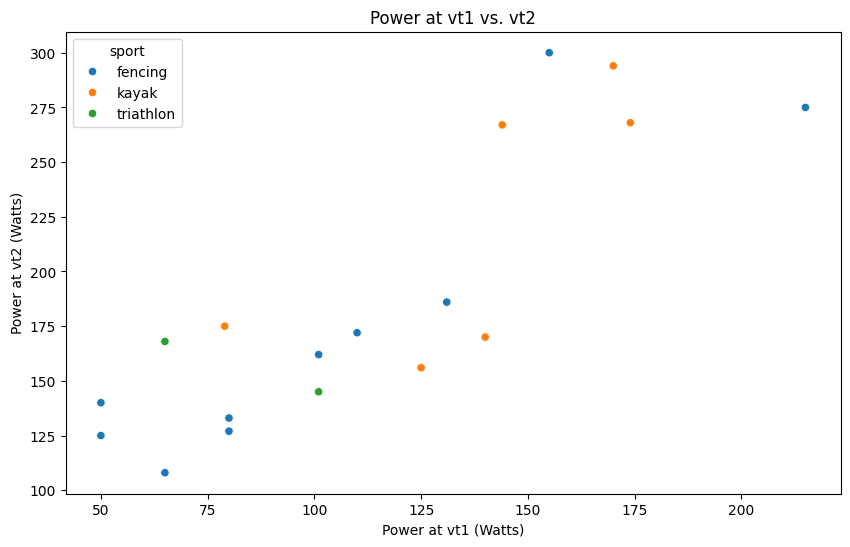

In [33]:
#copying the required data from Athletes sheet
sport_power_data = data_Athletes[['sport','P_vt1','P_vt2']]

#plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'P_vt1', y= 'P_vt2', hue='sport', data=sport_power_data)

#setting up the title and labels
plt.title('Power at vt1 vs. vt2')
plt.xlabel('Power at vt1 (Watts)')
plt.ylabel('Power at vt2 (Watts)')

#display the plot
plt.show()

Analysis: The above plot shows that there is a lot of variability in power outputs among athletes in fencing sport 
when compared to other sports. And also it shows that kayaking has the higher power outputs among all 
three sports.

**7. Which athlete has the least endurance level in terms of VO2.**

In [34]:
#grouping the data and calculating VO2Sum for each athlete
vo2_data = data_Merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2Sum')

#merging the data to fetch the weight of each athlete
req_data = pd.merge(vo2_data, data_Athletes[['ID','Weight','sport','First Name','Last Name']], 
                    on='ID', how='inner')

#calculating VO2Max
req_data['VO2Max'] = req_data['VO2Sum']/req_data['Weight']

#finding the athlete with least VO2 Max
vo2max_data = req_data[req_data['VO2Max'] == req_data['VO2Max'].min()]
athlete_ID = vo2max_data['ID'].values[0]
name = vo2max_data['First Name'] + ' ' + vo2max_data['Last Name']
athlete_name = name.values[0]

#printing the result
print(f"Athlete {athlete_name} with ID {athlete_ID} has the least endurance level in terms of VO2Max")

Athlete Grace Simmons with ID 7 has the least endurance level in terms of VO2Max


**8. Relationship between all the given variables of atheletes.**

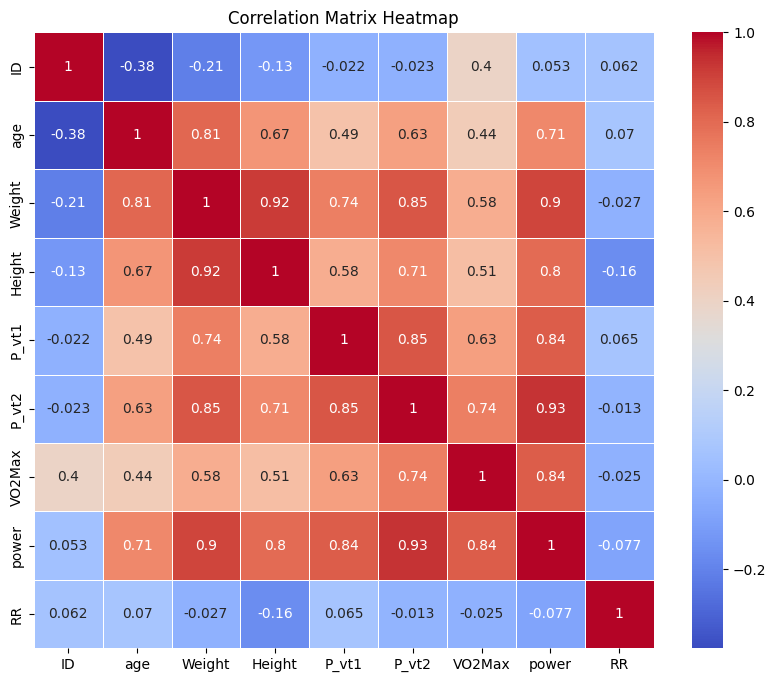

In [45]:
#copying athletes data into a dataframe
data  = data_Athletes[['ID','age','Weight','Height','P_vt1','P_vt2']]

#grouping the data and calculating VO2Sum for each athlete
vo2_data = data_Merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2Sum')

#merging the data to fetch the details of each athlete
vo2max_data = pd.merge(vo2_data, data_Athletes[['ID','Weight','sport','First Name','Last Name']], 
                     on='ID', how='inner')

#calculating VO2Max
vo2max_data['VO2Max'] = req_data['VO2Sum']/req_data['Weight']

#again merging the data we have with the vo2 max data to get vo2 max
all_data = pd.merge(data,vo2max_data[['ID','VO2Max']], on = 'ID', how = 'inner')

#grouping and merging the data to get power and RR from Merged dataset
merged_data = data_Merged.groupby(['ID'])[['power','RR']].mean().reset_index()
all_data = pd.merge(all_data,merged_data[['ID','power','RR']],on = 'ID', how = 'inner')

#correlation matrix 
corr_matrix = all_data.corr()

#showing the correlation with heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

#setting up the title and displaying the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


Analysis: In the above above plot it is evident that there is a positive correlation between the varables age, weight, height, power, P_vt1, P_vt2 and VO2Max. And negative correlation with respect to RR.

**9. Which sport has the highest average power output?**

In [36]:
#fetching sport data
sport_data = data_Athletes[['ID','sport']]

#fetching sum of power output for all the IDs
power_data = data_Merged.groupby(['ID'])['power'].sum().reset_index(name = 'power output')

#merging both the data based on ID column
merged_data = pd.merge(sport_data,power_data[['ID','power output']], on = 'ID', how = 'inner')

#calculating mean power output for each sport
final_data = merged_data.groupby(['sport'])['power output'].mean().reset_index(name = 'avgpoweroutput')

#finding the maximum avg power output
final_data = final_data[final_data['avgpoweroutput'] == final_data['avgpoweroutput'].max()]

#assigning the value to a variable
sport = final_data['sport'].values[0]

#printing the result
print(f"{sport} sport has the highest average power output among all the sports")

kayak sport has the highest average power output among all the sports
